<a href="https://colab.research.google.com/github/edsoncezar16/eda-churn/blob/main/analise.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Importando bibliotecas e configurações preliminares 

In [1]:
# importando bibliotecas necessarias
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

# ajustando uma configuração satisfatória para os gráficos
sns.set_theme(style='darkgrid', rc={'figure.figsize':(12,6)})


# Lendo os dados

In [4]:
churn_data_raw = pd.read_csv('/content/churn.csv', index_col='RowNumber')

# Tratamento dos dados

## Visualizando algumas instâncias da base de dados

In [5]:
churn_data_raw.head()

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
RowNumber,,,,,,,,,,,,,
1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


## Obtendo informações da base de dados

In [6]:
churn_data_raw.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10000 entries, 1 to 10000
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CustomerId       10000 non-null  int64  
 1   Surname          10000 non-null  object 
 2   CreditScore      10000 non-null  int64  
 3   Geography        10000 non-null  object 
 4   Gender           10000 non-null  object 
 5   Age              10000 non-null  int64  
 6   Tenure           10000 non-null  int64  
 7   Balance          10000 non-null  float64
 8   NumOfProducts    10000 non-null  int64  
 9   HasCrCard        10000 non-null  int64  
 10  IsActiveMember   10000 non-null  int64  
 11  EstimatedSalary  10000 non-null  float64
 12  Exited           10000 non-null  int64  
dtypes: float64(2), int64(8), object(3)
memory usage: 1.1+ MB


Notamos que não há dados faltantes. Quanto ao significado das variáveis, dispomos do seguinte dicionário de dados:

CustomerId: identificação do cliente.

Surname: sobrenome do cliente.

CreditScore: pontuação de credito, 0 alto risco de inadimplência e 1000 clientes com baixo risco de inadimplência.

Geography: país que o serviço é oferecido.

Gender: sexo do cliente.

Age: idade do cleinte.

Tenure: um indicativo de estabilidade no emprego, em que 0 significa pouca estabilidade e 10 muita estabilidade.

Balance: saldo da conta corrente.

NumOfProducts: número de produtos bancários adquiridos.

HasCrCard: se tem cartão de credito ou não, (Sim = 1 e Não = 0).

IsActiveMember: se é um cliente com conta ativa, (Ativo = 1).

EstimatedSalary: salário estimado.

Exited: cliente deixou de ser cliente do banco ou não (Churn = 1).


# Analisando a distribuição da variável alvo

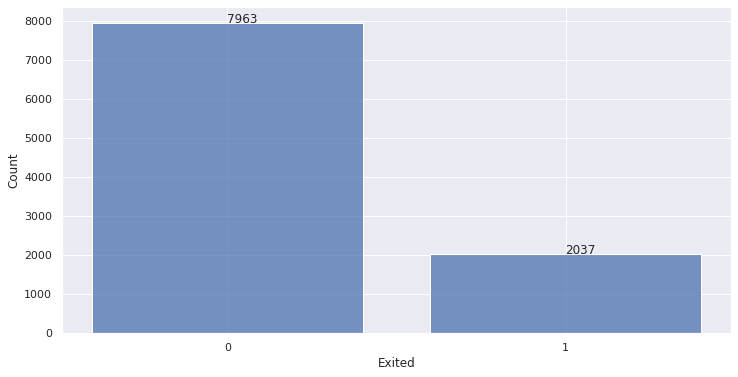

In [7]:
ax = sns.histplot(
            data=churn_data_raw, x='Exited', discrete=True, 
            shrink=0.8
        )
xticks = []
for rectangle in ax.patches:
    count = rectangle.get_height()
    x = rectangle.get_x() + rectangle.get_width() / 2
    y = rectangle.get_height()
    ax.annotate(f'{count}', (x, y))
    xticks.append(x)
ax.set_xticks(xticks)

Dado que o total de daos é 10000, temos aproximadamente 20% de clientes que deram churn. Vamos analisar o impacto desse status de cliente na distribuição das variáveis mais propícias a explicar o cenário.


# Analisando a relação entre CreditScore e Exited

## Distribuição de CreditScore

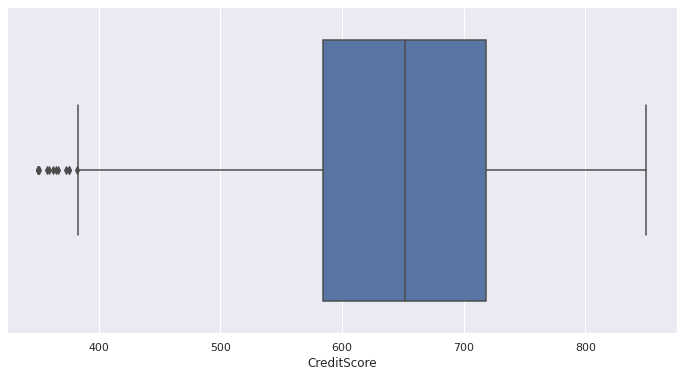

In [9]:
sns.boxplot(data=churn_data_raw, x='CreditScore')

In [16]:
churn_data_raw.CreditScore.describe()

count    10000.000000
mean       650.528800
std         96.653299
min        350.000000
25%        584.000000
50%        652.000000
75%        718.000000
max        850.000000
Name: CreditScore, dtype: float64

## Comparação entre diferentes status de churn

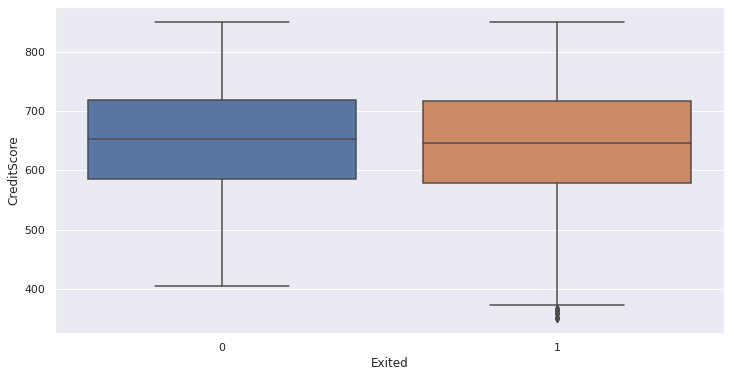

In [14]:
sns.boxplot(data=churn_data_raw, x='Exited', y='CreditScore')

In [17]:
print('Estatísticas para o perfil sem churn')
churn_data_raw[churn_data_raw.Exited == 0].CreditScore.describe()

Estatísticas para o perfil sem churn


count    7963.000000
mean      651.853196
std        95.653837
min       405.000000
25%       585.000000
50%       653.000000
75%       718.000000
max       850.000000
Name: CreditScore, dtype: float64

In [18]:
print('Estatísticas para o perfil de churn')
churn_data_raw[churn_data_raw.Exited == 1].CreditScore.describe()

Estatísticas para o perfil de churn


count    2037.000000
mean      645.351497
std       100.321503
min       350.000000
25%       578.000000
50%       646.000000
75%       716.000000
max       850.000000
Name: CreditScore, dtype: float64

Podemos notar que, embora as principais métricas das distribuições de CreditScore sejam praticamente as mesmas tanto entre os clientes que deram churn ou os que não deram, notamos que todos os outliers de CreditScore possuem valor baixo e deram churn.

Assim, podemos afirmar que **uma das características dos clientes que deram churn é ter um baixo risco de credit score**.

Por "baixo credit score" podemos definir como sendo um outlier no box plot.

In [19]:
credit_score_stats = churn_data_raw.CreditScore.describe()
Q1 = credit_score_stats['25%']
IQR = credit_score_stats['75%'] -  credit_score_stats['25%']
critical_credit_score = Q1 - 1.5 * IQR
print(f'O valor crítco para definir um baixo credit score é {critical_credit_score}.')

O valor crítco para definir um baixo credit score é 383.0.


# Analisando a relação entre Geography e Exited

## Distribuição de Geography

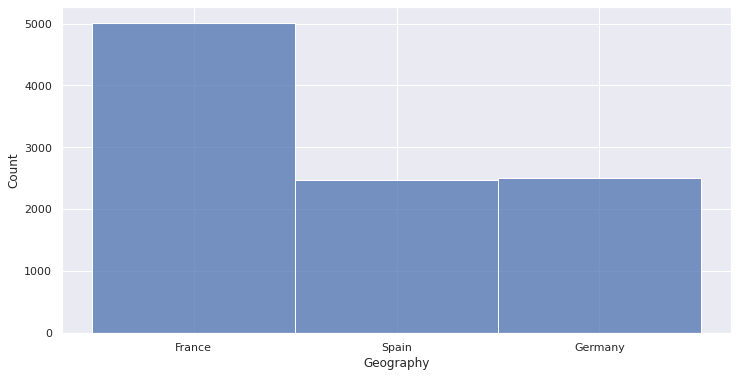

In [20]:
sns.histplot(data=churn_data_raw, x='Geography')

In [21]:
churn_data_raw.Geography.describe()

count      10000
unique         3
top       France
freq        5014
Name: Geography, dtype: object

In [22]:
churn_data_raw.Geography.value_counts()

France     5014
Germany    2509
Spain      2477
Name: Geography, dtype: int64

## Comparação entre diferentes status de churn

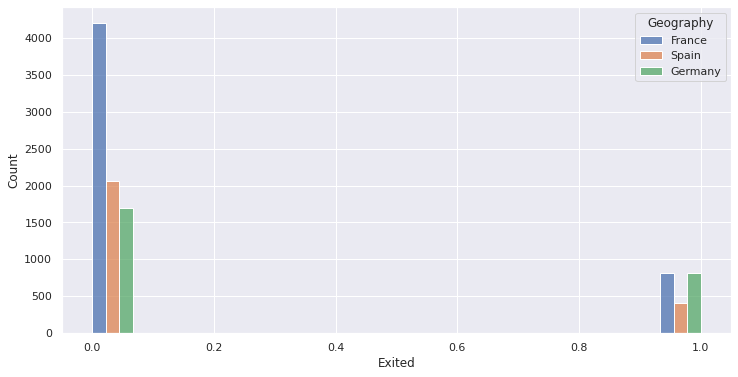

In [24]:
sns.histplot(data=churn_data_raw, x='Exited', hue='Geography', multiple='dodge')

Notamos que, embora a uma maior proporção de clientes da Alemanha tenha dado churn, em comparação com os demais países, isso pode se dar pelo simples fato de que a França possui praticamente o dobro de clientes. Assim, num primeiro momento não iremos considerar esse fator como determinante.

# Analisando a relação entre Gender e Exited

## Distribuição de Gender

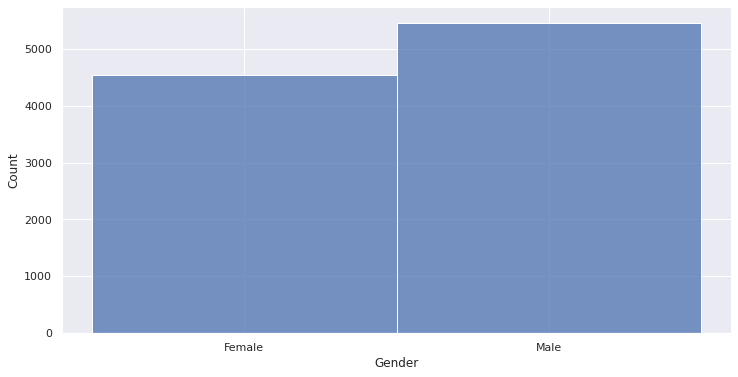

In [25]:
sns.histplot(data=churn_data_raw, x='Gender')

In [26]:
churn_data_raw.Gender.describe()

count     10000
unique        2
top        Male
freq       5457
Name: Gender, dtype: object

In [27]:
churn_data_raw.Gender.value_counts()

Male      5457
Female    4543
Name: Gender, dtype: int64

## Comparação entre diferentes status de churn

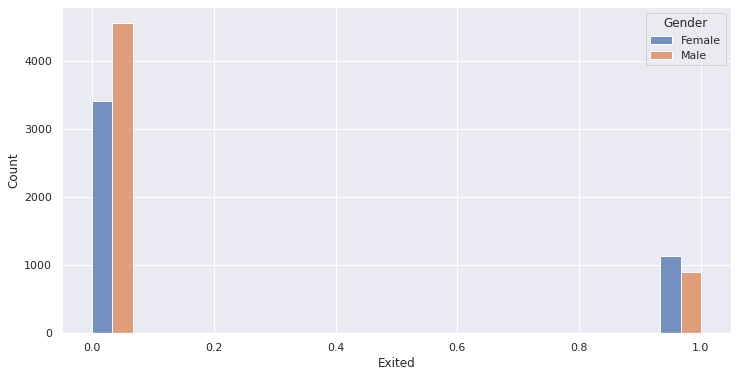

In [28]:
sns.histplot(data=churn_data_raw, x='Exited', hue='Gender', multiple='dodge')

Neste caso, podemos concluir algo similar ao encontrado na análise da localização geográfica da instituição vinculada ao cliente.

# Analisando a relação entre Age e Exited

## Distribuição de Age

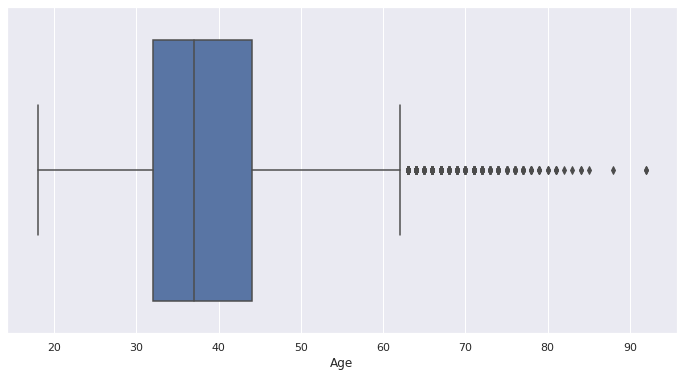

In [29]:
sns.boxplot(data=churn_data_raw, x='Age')

In [30]:
churn_data_raw.Age.describe()

count    10000.000000
mean        38.921800
std         10.487806
min         18.000000
25%         32.000000
50%         37.000000
75%         44.000000
max         92.000000
Name: Age, dtype: float64

## Comparação entre diferentes status de churn

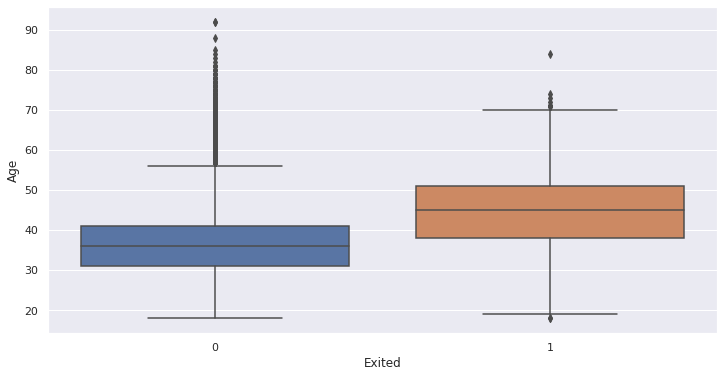

In [31]:
sns.boxplot(data=churn_data_raw, x='Exited', y='Age')

In [32]:
print('Estatísticas para o perfil sem churn')
churn_data_raw[churn_data_raw.Exited == 0].Age.describe()

Estatísticas para o perfil sem churn


count    7963.000000
mean       37.408389
std        10.125363
min        18.000000
25%        31.000000
50%        36.000000
75%        41.000000
max        92.000000
Name: Age, dtype: float64

In [33]:
print('Estatísticas para o perfil de churn')
churn_data_raw[churn_data_raw.Exited == 1].Age.describe()

Estatísticas para o perfil de churn


count    2037.000000
mean       44.837997
std         9.761562
min        18.000000
25%        38.000000
50%        45.000000
75%        51.000000
max        84.000000
Name: Age, dtype: float64

Podemos notar que há uma diferença considerável nas distribuições de idade entre os clientes que deram churn e os que não deram. Em particular, notamos que **uma das características dos clientes que deram churn é ter uma idade elevada**.

Um valor razoável para definir como critério para definir 'idade elevada' é a mediana do grupo de churn, ou seja, 45 anos.

# Analisando a relação entre Tenure e Exited

## Distribuição de Tenure

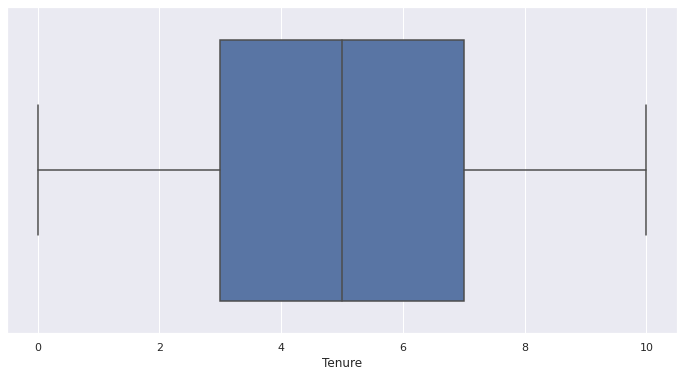

In [36]:
sns.boxplot(data=churn_data_raw, x='Tenure')

In [37]:
churn_data_raw.Tenure.describe()

count    10000.000000
mean         5.012800
std          2.892174
min          0.000000
25%          3.000000
50%          5.000000
75%          7.000000
max         10.000000
Name: Tenure, dtype: float64

## Comparação entre diferentes status de churn

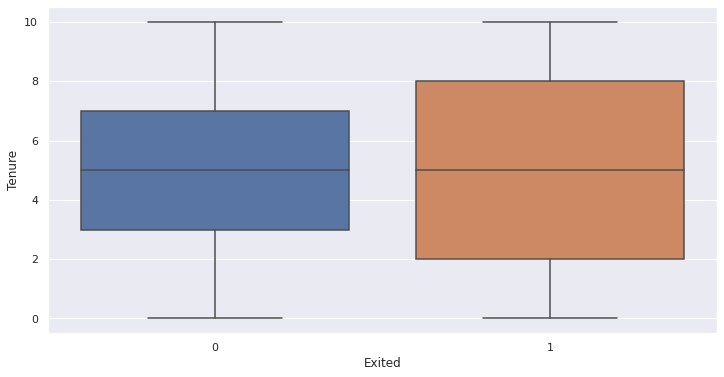

In [38]:
sns.boxplot(data=churn_data_raw, x='Exited', y='Tenure')

In [40]:
print('Estatísticas para o perfil sem churn')
churn_data_raw[churn_data_raw.Exited == 0].Tenure.describe()

Estatísticas para o perfil sem churn


count    7963.000000
mean        5.033279
std         2.880658
min         0.000000
25%         3.000000
50%         5.000000
75%         7.000000
max        10.000000
Name: Tenure, dtype: float64

In [41]:
print('Estatísticas para o perfil de churn')
churn_data_raw[churn_data_raw.Exited == 1].Tenure.describe()

Estatísticas para o perfil de churn


count    2037.000000
mean        4.932744
std         2.936106
min         0.000000
25%         2.000000
50%         5.000000
75%         8.000000
max        10.000000
Name: Tenure, dtype: float64

Podemos notar que não há uma diferença considerável nas distribuições de Tenure entre os clientes que deram churn e os que não deram.

# Analisando a relação entre HasCrCard e Exited

## Distribuição de HasCrCard

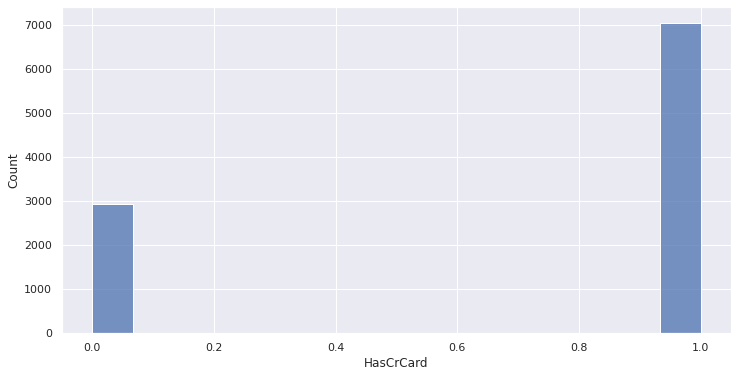

In [46]:
sns.histplot(data=churn_data_raw, x='HasCrCard')

In [48]:
churn_data_raw.HasCrCard.value_counts()

1    7055
0    2945
Name: HasCrCard, dtype: int64

## Comparação entre diferentes status de churn

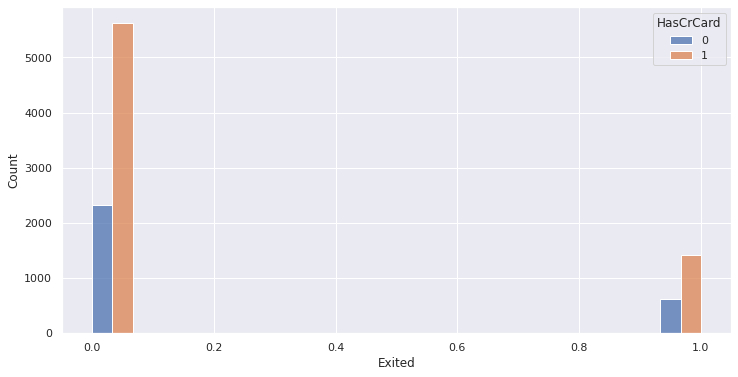

In [50]:
sns.histplot(data=churn_data_raw, x='Exited', hue='HasCrCard', multiple='dodge')

Podemos notar que não há elementos para considerarmos que o fato de um cliente ter ou não cartão de crédito influencia decisivamente sua chande de dar churn.

# Analisando a relação entre IsActiveMember e Exited

## Distribuição de IsActiveMember

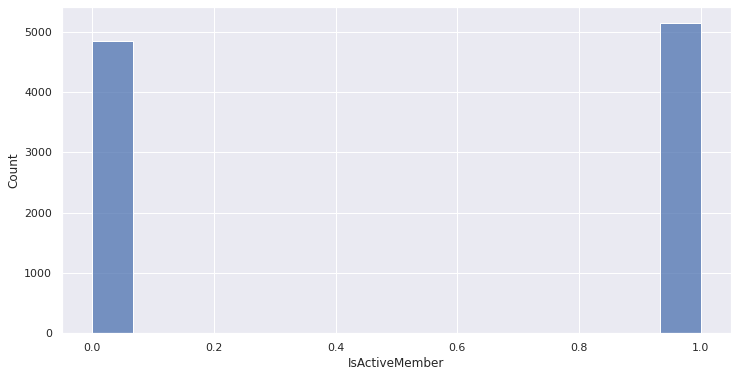

In [53]:
sns.histplot(data=churn_data_raw, x='IsActiveMember')

In [54]:
churn_data_raw.IsActiveMember.value_counts()

1    5151
0    4849
Name: IsActiveMember, dtype: int64

## Comparação entre diferentes status de churn

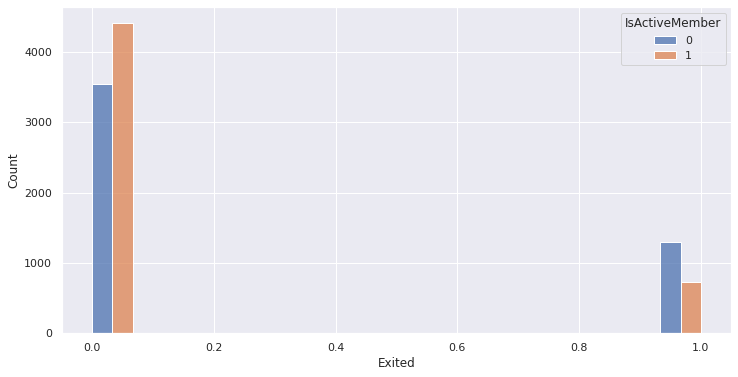

In [55]:
sns.histplot(data=churn_data_raw, x='Exited', hue='IsActiveMember', multiple='dodge')

Podemos notar que não há elementos para considerarmos que o fato de um cliente estar ou não ativo influencia decisivamente sua chande de dar churn.

# Analisando a relação entre EstimatedSalary e Exited

## Distribuição de EstimatedSalary

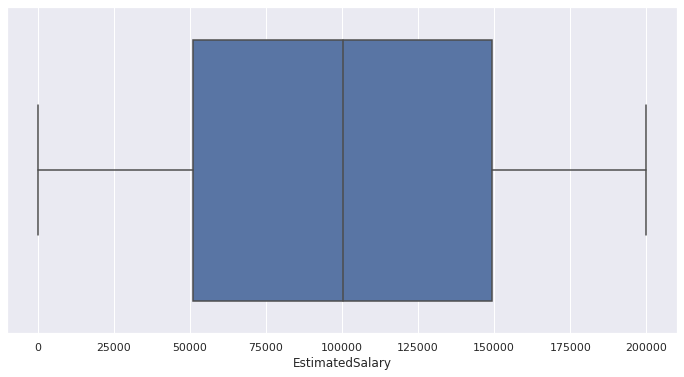

In [62]:
sns.boxplot(data=churn_data_raw, x='EstimatedSalary')

In [63]:
churn_data_raw.EstimatedSalary.describe()

count     10000.000000
mean     100090.239881
std       57510.492818
min          11.580000
25%       51002.110000
50%      100193.915000
75%      149388.247500
max      199992.480000
Name: EstimatedSalary, dtype: float64

## Comparação entre diferentes status de churn

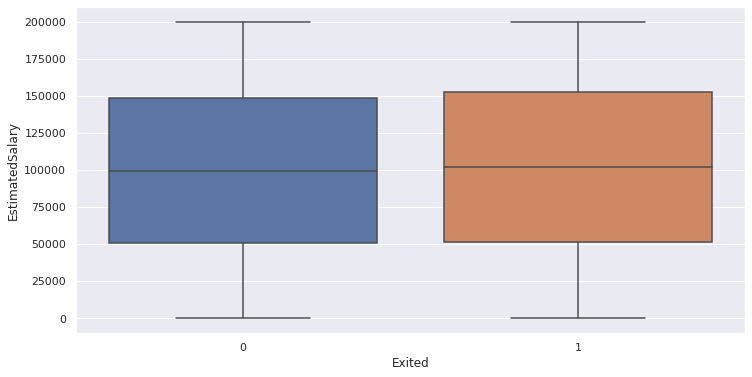

In [64]:
sns.boxplot(data=churn_data_raw, x='Exited', y='EstimatedSalary')

In [66]:
print('Estatísticas para o perfil sem churn')
churn_data_raw[churn_data_raw.Exited == 0].EstimatedSalary.describe()

Estatísticas para o perfil sem churn


count      7963.000000
mean      99738.391772
std       57405.586966
min          90.070000
25%       50783.490000
50%       99645.040000
75%      148609.955000
max      199992.480000
Name: EstimatedSalary, dtype: float64

In [67]:
print('Estatísticas para o perfil de churn')
churn_data_raw[churn_data_raw.Exited == 1].EstimatedSalary.describe()

Estatísticas para o perfil de churn


count      2037.000000
mean     101465.677531
std       57912.418071
min          11.580000
25%       51907.720000
50%      102460.840000
75%      152422.910000
max      199808.100000
Name: EstimatedSalary, dtype: float64

Apesar do valor do primeiro quartil para os balanços das contas dos usuários que deram churn ser maior do que entre os que permaneceram no banco, o que é contraintuitivo de certa forma, não notamos um efeito decisivo dessa variável no fenômeno estudado.

# Analisando a relação entre Balance e Exited

## Distribuição de Balance

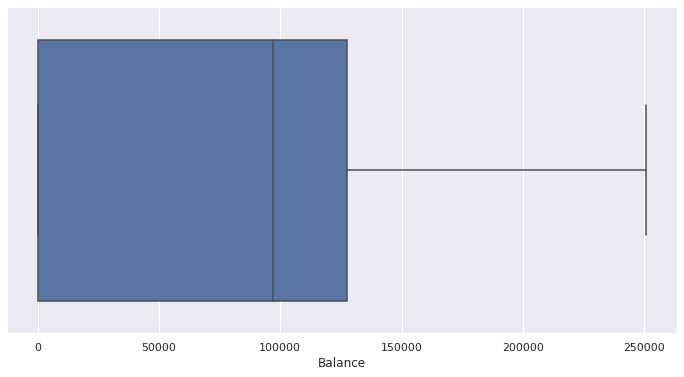

In [ ]:
sns.boxplot(data=churn_data_raw, x='Balance')

In [ ]:
churn_data_raw.Balance.describe()

count     10000.000000
mean      76485.889288
std       62397.405202
min           0.000000
25%           0.000000
50%       97198.540000
75%      127644.240000
max      250898.090000
Name: Balance, dtype: float64

## Comparação entre diferentes status de churn

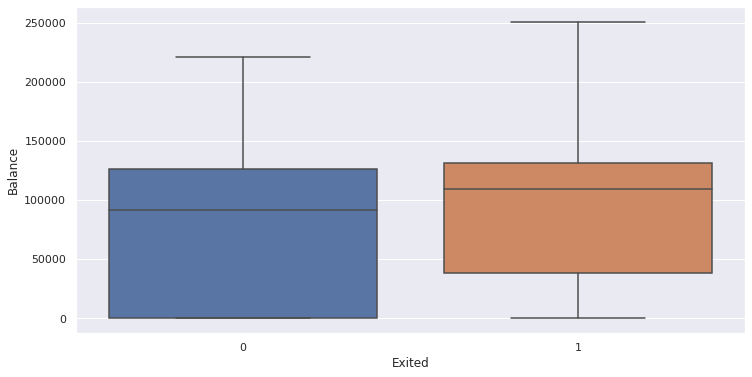

In [ ]:
sns.boxplot(data=churn_data_raw, x='Exited', y='Balance')

In [ ]:
print('Estatísticas para o perfil sem churn')
churn_data_raw[churn_data_raw.Exited == 0].Balance.describe()

Estatísticas para o perfil sem churn


count      7963.000000
mean      72745.296779
std       62848.040701
min           0.000000
25%           0.000000
50%       92072.680000
75%      126410.280000
max      221532.800000
Name: Balance, dtype: float64

In [ ]:
print('Estatísticas para o perfil de churn')
churn_data_raw[churn_data_raw.Exited == 1].Balance.describe()

Estatísticas para o perfil de churn


count      2037.000000
mean      91108.539337
std       58360.794816
min           0.000000
25%       38340.020000
50%      109349.290000
75%      131433.330000
max      250898.090000
Name: Balance, dtype: float64

Apesar do valor do primeiro quartil para os balanços das contas dos usuários que deram churn ser maior do que entre os que permaneceram no banco, o que é contraintuitivo de certa forma, não notamos um efeito decisivo dessa variável no fenômeno estudado.